# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz


import matplotlib.pyplot as plt

import graphviz

%matplotlib inline



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [2]:
df = pd.read_csv('housing.csv')
print(df.info())
base = pd.get_dummies(df)
print(base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude         

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

(<seaborn.matrix.ClusterGrid at 0x2310456d5e0>,)

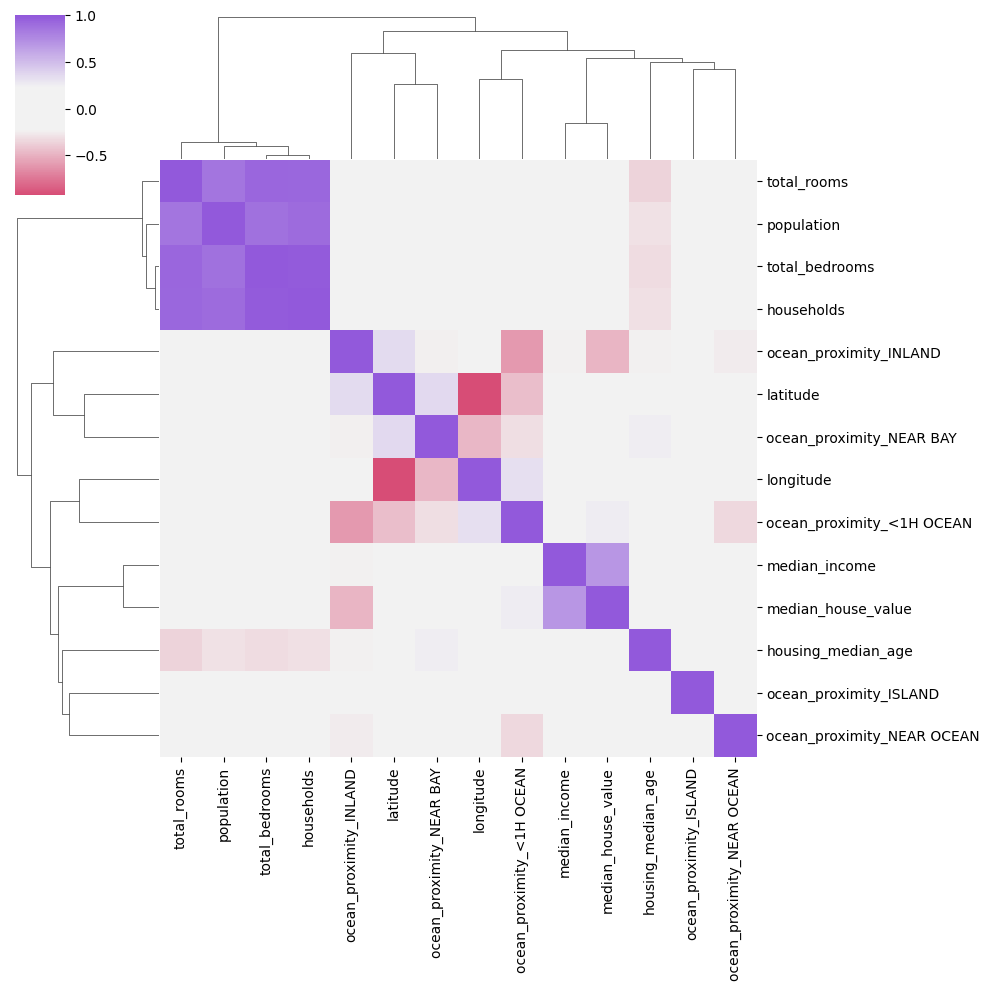

In [3]:
cmap = sns.diverging_palette(h_neg=0, h_pos=999, as_cmap=True, sep=60, center='light')
sns.clustermap((base.corr()), figsize=(10, 10), center=0, cmap=cmap), 

<Axes: xlabel='median_house_value', ylabel='median_income'>

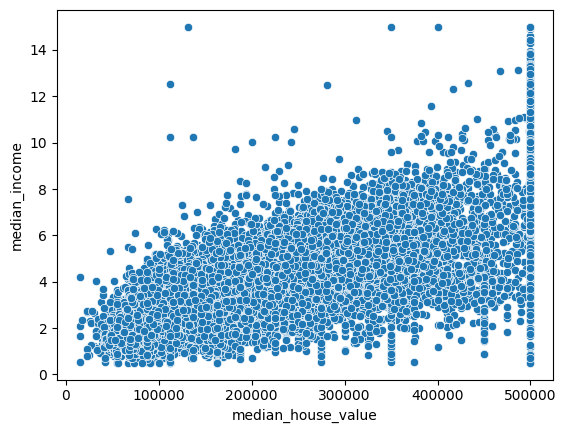

In [4]:
sns.scatterplot(x='median_house_value', y='median_income', data=base)

<Axes: xlabel='ocean_proximity_INLAND', ylabel='median_house_value'>

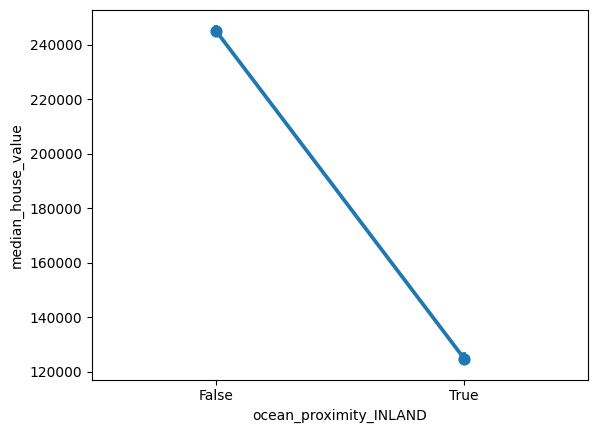

In [5]:
sns.pointplot(x='ocean_proximity_INLAND', y='median_house_value',
                   data=base, dodge=True, errorbar=('ci', 90))

In [6]:
## Essas são as duas variáveis que mais possuem correlação com a variável 'median_house_value', que é a variável estudada.

### 3. Separe os dados em validação e teste

In [7]:
X = base.drop(columns=['median_house_value']).copy()
y = base['median_house_value'].copy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [9]:
regr_1 = DecisionTreeRegressor(max_depth=8)
regr_2 = DecisionTreeRegressor(max_depth=2)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [10]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O R-quadrado da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(), mse1).replace('.', ','))
print(template.format(regr_2.get_depth(), mse2).replace('.', ','))

O R-quadrado da árvore com profundidade=8 é: 0,76
O R-quadrado da árvore com profundidade=2 é: 0,50


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [11]:
## A árvore com profundidade 8, acredito que uma base com mais dados funciona melhor com mais profundidade, talvez fique até melhor com mais profundidade,
#Exemplo:
regr_3 = DecisionTreeRegressor(max_depth=10)
regr_3.fit(X_train, y_train)
mse3 = regr_3.score(X_train, y_train)
print(template.format(regr_3.get_depth(), mse3).replace('.', ','))

O R-quadrado da árvore com profundidade=10 é: 0,83


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

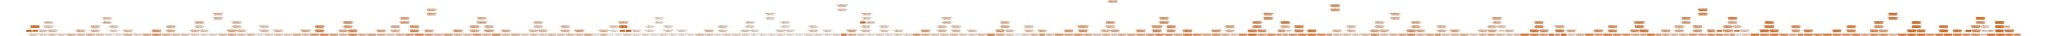

In [23]:
dot_data = tree.export_graphviz(regr_1, out_file=None,
                                feature_names=X.columns,
                                filled=True)

graph = graphviz.Source(dot_data, format='png')
graph